### Time Series Analysis Using AirPassengers Dataset:
 Forecasting Number of passengers for next 5 years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\VIVEK\Downloads\AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
# Convert 'Month' into datetime format.
data['Month'] = pd.to_datetime(data['Month'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
#Convert 'Month' column as index:
data.index = data['Month']
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [9]:
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [10]:
del data['Month']

In [11]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

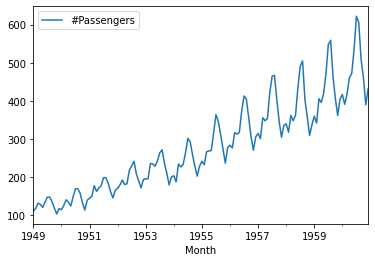

In [12]:
data.plot()

#### Applying Rolling Mean & Standard Deviation

In [13]:
mean_log = data.rolling(window=12).mean()
std_log = data.rolling(window=12).std()

In [14]:
mean_log

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

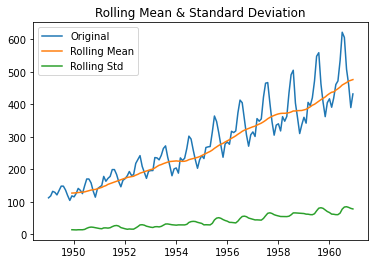

In [15]:
plt.plot(data,label='Original')
plt.plot(mean_log,label='Rolling Mean')
plt.plot(std_log,label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

#### Using Log Transform:

In [16]:
first_log = np.log(data)
first_log = first_log.dropna()

<AxesSubplot:xlabel='Month'>

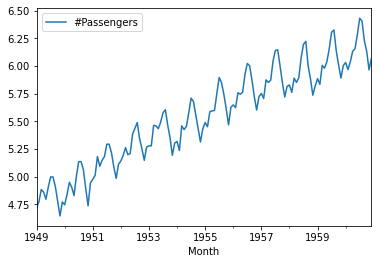

In [17]:
first_log.plot()

In [18]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

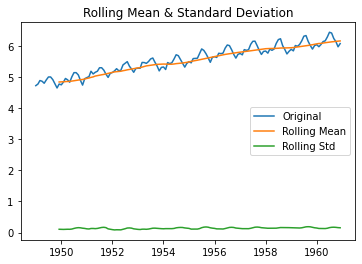

In [19]:
plt.plot(first_log,label='Original')
plt.plot(mean_log,label='Rolling Mean')
plt.plot(std_log,label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [20]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [21]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

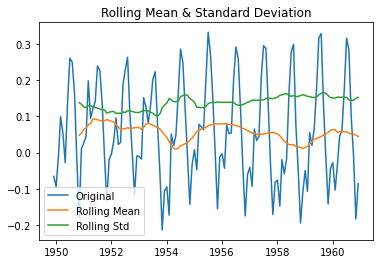

In [22]:
plt.plot(new_data,label='Original')
plt.plot(mean_log,label='Rolling Mean')
plt.plot(std_log,label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

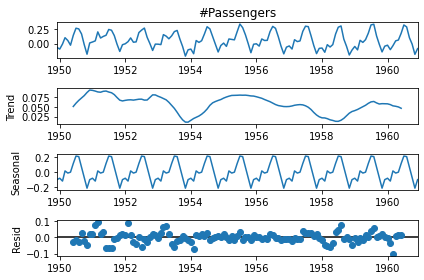

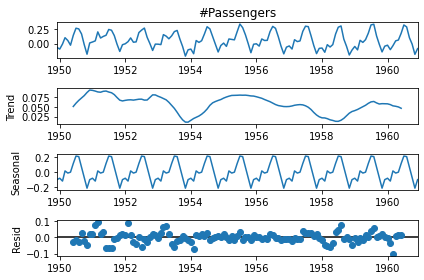

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_data['#Passengers'].dropna())
decompose_result.plot()

In [24]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

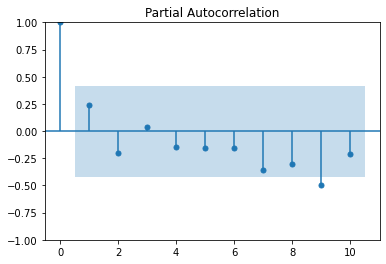

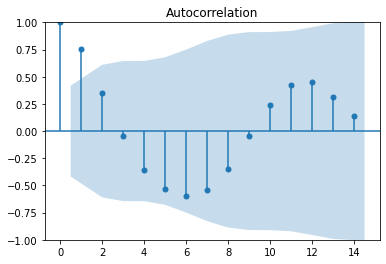

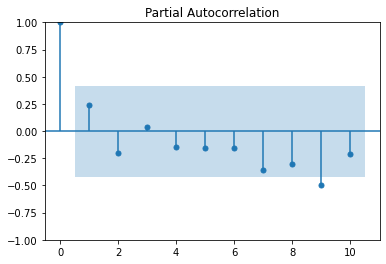

In [25]:
acf_plot = acf(new_data)
pacf_plot = pacf(new_data)
plot_acf(acf_plot)
plot_pacf(pacf_plot,lags=10)

In [26]:
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [27]:
acf_plot

array([ 1.        ,  0.68065997,  0.22609945, -0.13991865, -0.40412573,
       -0.45962895, -0.46469   , -0.4663934 , -0.39774561, -0.1211283 ,
        0.2098406 ,  0.58402047,  0.83176962,  0.57645908,  0.17875601,
       -0.13690291, -0.3673964 , -0.42403518, -0.43747799, -0.45435461,
       -0.40151834, -0.14279633])

In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']

In [30]:
a_model = ARIMA(train,order=(1,0,2))

C:\Users\VIVEK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\VIVEK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\VIVEK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [31]:
a_model = a_model.fit()

In [32]:
len(test)

12

In [33]:
new_data['Predict'] = a_model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)

<AxesSubplot:xlabel='Month'>

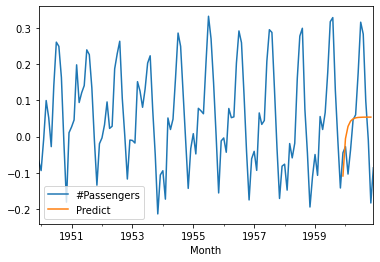

In [34]:
new_data[['#Passengers','Predict']].plot()

Here we can see ARIMA is not forecasting well.
Now, we will use SARIMAX. (Becoz of seasonality)

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [36]:
sx_model = SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))

C:\Users\VIVEK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\VIVEK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [37]:
sx_model = sx_model.fit()

C:\Users\VIVEK\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
new_data['sx_predict'] = sx_model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)

<AxesSubplot:xlabel='Month'>

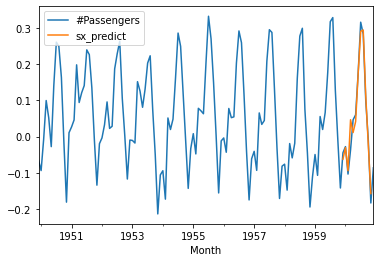

In [39]:
new_data[['#Passengers','sx_predict']].plot()

<AxesSubplot:xlabel='Month'>

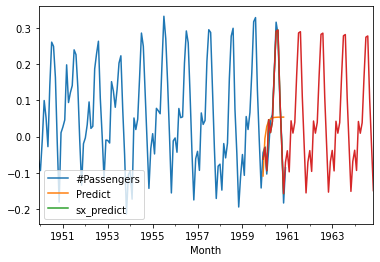

In [40]:
# Forcasting next 60 Months.
forecast = sx_model.forecast(steps=60)  
new_data.plot()
forecast.plot()

In [41]:
     #END#